<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Majorana Braiding in the Surface Code*_ 


***
### Contributors
James Wootton
***

In this notebook we will reproduce an experiment in which Majorana defects are braided in a surface code. The results of the orginal experiment were published in [Quantum Science and Technology, Volume 2, Number 1 (2017)](https://arxiv.org/abs/1609.07774). Some articles aimed at non-experts can be found [here](https://medium.com/@decodoku/lifting-majoranas-mask-4469928ee1).

In this notebook we'll assume familiarity with the experiment, and focus on how to implement it with Qiskit.

To perform the experiment using Qiskit, we first need to import the tools we'll need to create and run quantum circuits.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, register
from qiskit.tools.visualization import plot_histogram, circuit_drawer

To run a simulation of the experiment, we need to import the simulators of `Aer`. To run it on a real device, we import `IBMQ`.

In [2]:
from qiskit import Aer, IBMQ
IBMQ.load_accounts()

Our program requires 5 qubits and 5 output bits, so we first set that up.

In [3]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
program = QuantumCircuit(qr, cr)

Then we write the program, as set out in the paper.

In [4]:
# measure outcome of Y_2 Y_4 on qubit 3

program.h(qr[2])
program.sdg(qr[2])
program.cx(qr[2],qr[3])
program.s(qr[2])
program.h(qr[2])

program.h(qr[4])
program.sdg(qr[4])
program.cx(qr[4],qr[3])
program.s(qr[4])
program.h(qr[4])

program.measure(qr[3],cr[3])

# measure outcome of X_0 X_2 with qubit 1

program.h(qr[0])
program.cx(qr[0],qr[1])
program.h(qr[0])

program.h(qr[2])
program.cx(qr[2],qr[1])
program.h(qr[2])

program.measure(qr[1],cr[2])

# measure outcome of Z_2 on qubit 2
program.measure(qr[2],cr[4])

# measure outcomes of Majorana fusions with Z measurements on qubits 0 and 4
program.measure(qr[0],cr[0])
program.measure(qr[4],cr[1])

We can use the circuit drawer to take a look at it.

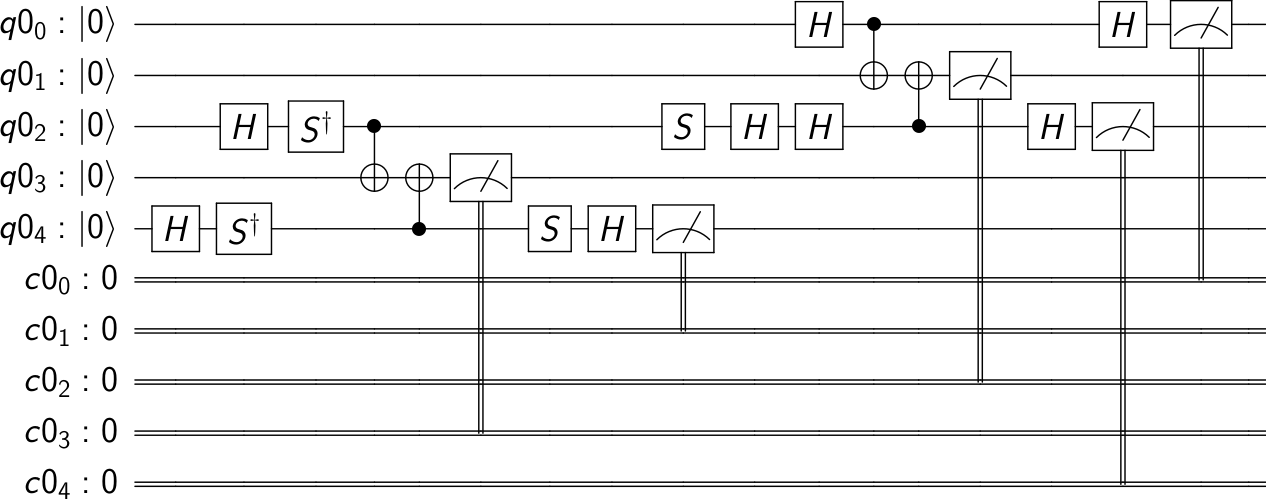

In [5]:
circuit_drawer(program)

Theory predicts that the results of these final measurements will satisfy the following two properties when the results of all other measurements are `0`.
1. Randomly be either `0` or `1`
2. Always agree with each other, despite this randomness.

Let's run it and see if this is true.

In [ ]:
for backend in [Aer.get_backend('qasm_simulator'),IBMQ.get_backend('ibmqx4')]:

    job = execute(program, backend)
    results = job.result().get_counts()

    Z = 0
    for bitstring in results:
        if bitstring[0]=='0' and bitstring[1]=='0' and bitstring[2]=='0' :
            Z += results[bitstring]

    P = 0
    for string in ['00001','00011']:
        try:
            P += results[string]/Z
        except:
            pass
    C = ( results['00000']+results['00011'] ) / Z
    
    print('With device:',backend)
    print('Probability of output 1 =',P)
    print('Probability of agreement =',C,'\n')

With device: qasm_simulator_py
Probability of output 1 = 0.5433070866141733
Probability of agreement = 1.0 



This has also just sent the job to run on a real prototype quantum computer. But we won't wait for the results to come back!